# Monte Carlo Simulation with EVI - GOOGLE

### Authors: Artem Klasberg & David Crespo

--- Running Monte Carlo Simulation ---

Simulation Results (Value of Data in Billions USD)
Number of Simulations: 10000
-----------------------------------
Mean Value:         543.35 B
Median Value:       543.83 B
Standard Deviation: 250.83 B
Minimum Value:      -229.26 B
Maximum Value:      1300.66 B
5th Percentile:     124.11 B
95th Percentile:    956.22 B
-----------------------------------

Interpretation:
- Most likely outcome ≈ Median (543.83 B)
- Average outcome ≈ Mean (543.35 B)
- 90% of values between 124.11 B and 956.22 B


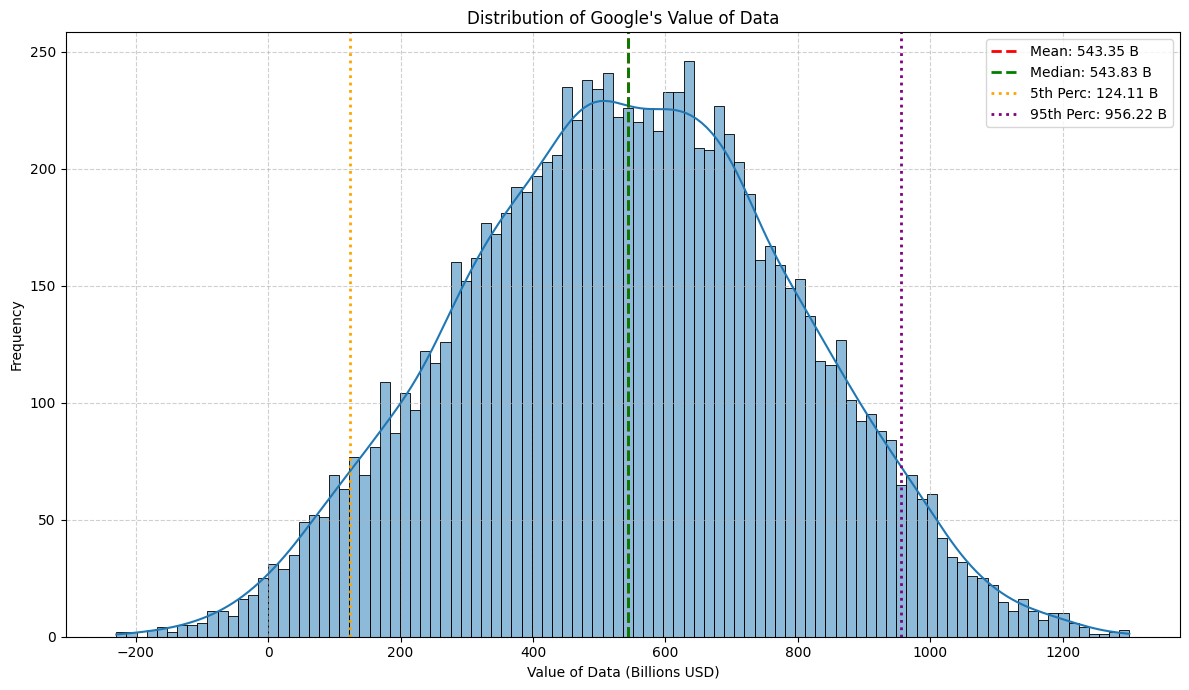


Total execution time: 0.36 seconds


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time  # ← add this

# Start overall timer
overall_start = time.time()

#  Simulation Parameters 
n_simulations = 10000

#  Variable Definitions and Parameters (in billions) 

# Variable: Revenue(i)
pv_revenue_min_influenced  = 134.81
pv_revenue_mean_influenced = 190.71
pv_revenue_max_influenced  = 237.86

# Variable: Revenue(c)
pv_revenue_min_control  =  3.7
pv_revenue_mean_control =  8.83
pv_revenue_max_control  = 12.2

pv_revenue_min  = pv_revenue_min_influenced  - pv_revenue_min_control
pv_revenue_mean = pv_revenue_mean_influenced - pv_revenue_mean_control
pv_revenue_max  = pv_revenue_max_influenced  - pv_revenue_max_control

# Variable: Acquisition Cost
acquisition_cost_min  = 30.09
acquisition_cost_mean = 36.01
acquisition_cost_max  = 44.34

# Variable: Administration Cost
admin_cost_min  = 28.02
admin_cost_mean = 63.77
admin_cost_max  = 82.45

# Variable: Application Cost
application_cost_min  = 26.02
application_cost_mean = 34.02
application_cost_max  = 45.43

# T/t factor
T = 11
t = 1
T_over_t = T / t

print("--- Running Monte Carlo Simulation ---")

#  Generate Random Samples
pv_revenue_samples = np.random.triangular(
    pv_revenue_min, pv_revenue_mean, pv_revenue_max, n_simulations
)
acquisition_cost_samples = np.random.triangular(
    acquisition_cost_min, acquisition_cost_mean, acquisition_cost_max, n_simulations
)
admin_cost_samples = np.random.triangular(
    admin_cost_min, admin_cost_mean, admin_cost_max, n_simulations
)
application_cost_samples = np.random.triangular(
    application_cost_min, application_cost_mean, application_cost_max, n_simulations
)

#  Calculate Value of Data
value_of_data_samples = (
    (pv_revenue_samples 
     - acquisition_cost_samples 
     - admin_cost_samples 
     - application_cost_samples)
    * T_over_t
)

#  Calculate Statistics 
mean_value     = np.mean(value_of_data_samples)
median_value   = np.median(value_of_data_samples)
std_dev_value  = np.std(value_of_data_samples)
min_value      = np.min(value_of_data_samples)
max_value      = np.max(value_of_data_samples)
percentile_5   = np.percentile(value_of_data_samples, 5)
percentile_95  = np.percentile(value_of_data_samples, 95)

#  Display Statistics 
print("\nSimulation Results (Value of Data in Billions USD)")
print(f"Number of Simulations: {n_simulations}")
print("-" * 35)
print(f"Mean Value:         {mean_value:.2f} B")
print(f"Median Value:       {median_value:.2f} B")
print(f"Standard Deviation: {std_dev_value:.2f} B")
print(f"Minimum Value:      {min_value:.2f} B")
print(f"Maximum Value:      {max_value:.2f} B")
print(f"5th Percentile:     {percentile_5:.2f} B")
print(f"95th Percentile:    {percentile_95:.2f} B")
print("-" * 35)
print("\nInterpretation:")
print(f"- Most likely outcome ≈ Median ({median_value:.2f} B)")
print(f"- Average outcome ≈ Mean ({mean_value:.2f} B)")
print(f"- 90% of values between {percentile_5:.2f} B and {percentile_95:.2f} B")

#  Visualize the Results 
plt.figure(figsize=(12, 7))
sns.histplot(value_of_data_samples, bins=100, kde=True)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {mean_value:.2f} B')
plt.axvline(median_value, color='green', linestyle='dashed', linewidth=2,
            label=f'Median: {median_value:.2f} B')
plt.axvline(percentile_5, color='orange', linestyle='dotted', linewidth=2,
            label=f'5th Perc: {percentile_5:.2f} B')
plt.axvline(percentile_95, color='purple', linestyle='dotted', linewidth=2,
            label=f'95th Perc: {percentile_95:.2f} B')
plt.title("Distribution of Google's Value of Data")
plt.xlabel('Value of Data (Billions USD)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# End overall timer and report
overall_end = time.time()
print(f"\nTotal execution time: {overall_end - overall_start:.2f} seconds")


Sensitivity Analysis (|Pearson corr| with value_of_data):
  revenue      : 0.842
  admin_cost   : 0.488
  application_cost : 0.174
  acquisition_cost : 0.132


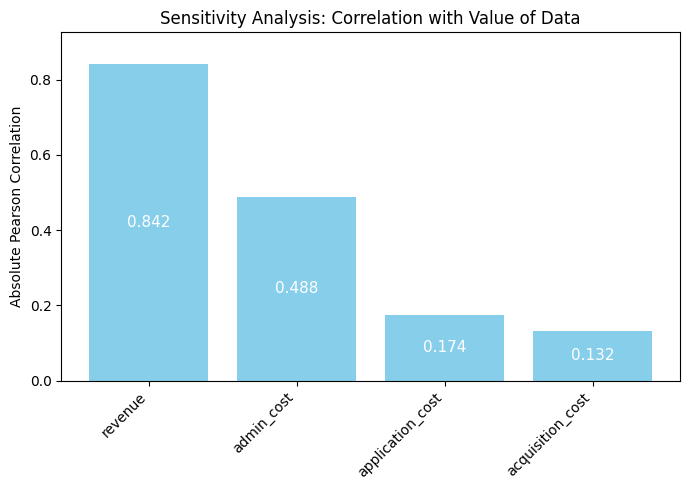

In [2]:
import pandas as pd

# df
df = pd.DataFrame({
    'revenue':      pv_revenue_samples,
    'acquisition_cost':     acquisition_cost_samples,
    'admin_cost':           admin_cost_samples,
    'application_cost':     application_cost_samples,
    'value_of_data':   value_of_data_samples
})

# correlations
corr_series = df.corr()['value_of_data'].drop('value_of_data')
abs_corr = corr_series.abs().sort_values(ascending=False)

# output
print("Sensitivity Analysis (|Pearson corr| with value_of_data):")
for var, corr_val in abs_corr.items():
    print(f"  {var:<12} : {corr_val:.3f}")

# plot
plt.figure(figsize=(7,5))
bars = plt.bar(abs_corr.index, abs_corr.values, color='skyblue') 

# data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval / 2,
             f'{yval:.3f}',
             va='center',
             ha='center',                    
             color='white',
             fontsize=11)

plt.title('Sensitivity Analysis: Correlation with Value of Data')
plt.ylabel('Absolute Pearson Correlation')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, abs_corr.values.max()*1.1)
plt.tight_layout()
plt.show()